# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다.
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 :
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다.
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다.
            * 예를 들어,
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ...
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/project/'

In [ ]:
data= pd.read_csv(path+file1)

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


#### 2) 라이브러리 로딩

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

#### 1) 데이터로딩

In [7]:
file1 = 'open_data.csv'
file2 = 'weather.csv'

In [8]:
# read_csv를 활용
open = pd.read_csv(file1)
weather = pd.read_csv(file2)

In [9]:
# to_datetime 활용, '기준일' 컬럼 타입 변경
open['기준일'] = pd.to_datetime(open['기준일'])
weather['Date'] = pd.to_datetime(weather['Date'])

#### 2) 기본 정보 조회

In [10]:
#전체 데이터의 행,열 개수 확인
print(open.shape)
print(weather.shape)

(2922, 7)
(4018, 7)


In [11]:
#전체 데이터의 모든 변수 확인
print(open.info())
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     2922 non-null   datetime64[ns]
 1   차량운행    2922 non-null   int64         
 2   접수건     2922 non-null   int64         
 3   탑승건     2922 non-null   int64         
 4   평균대기시간  2922 non-null   float64       
 5   평균요금    2922 non-null   int64         
 6   평균승차거리  2922 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 159.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4018 non-null   datetime64[ns]
 1   temp_max         4018 non-null   float64       
 2   temp_min         4018 non-null   float64       
 3   rain(mm)         4018 non-null   float64      

In [12]:
weather.head()

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46
3,2012-01-04,-4.6,-9.5,0.0,66.0,38.0,8.05
4,2012-01-05,-1.4,-9.6,0.0,71.0,28.0,9.14


In [13]:
open.columns

Index(['기준일', '차량운행', '접수건', '탑승건', '평균대기시간', '평균요금', '평균승차거리'], dtype='object')

#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.

In [14]:
# 컬럼 명으로 'Date','car_cnt','request_cnt','ride_cnt','waiting_time','fare','distance' 추천
open.columns=['Date','car_cnt','request_cnt','ride_cnt','waiting_time','fare','distance']
#'기준일', '차량운행', '접수건', '탑승건', '평균대기시간', '평균요금', '평균승차거리'

In [15]:
open.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663


## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [16]:
open2 = open.copy()

In [17]:
# dt.weekday, dt.month, dt.week, dt.year 활용
open['weekday'] = open['Date'].dt.weekday #요일
open['month'] = open['Date'].dt.month
open['week'] = open['Date'].dt.week
open['year'] = open['Date'].dt.year
open['day'] = open['Date'].dt.day

<ipython-input-17-49bebc45f40a>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  open['week'] = open['Date'].dt.week


In [18]:
open.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,2015,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5


### (2) 일별 (lineplot 활용)

* 차량 운행수

<Axes: xlabel='day', ylabel='car_cnt'>

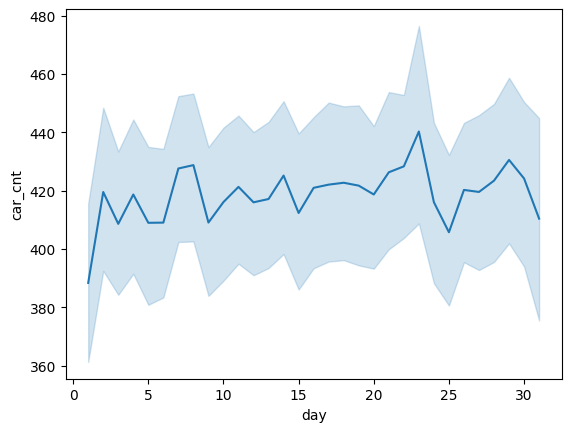

In [19]:
sns.lineplot(x='day',y='car_cnt',data=open)

* 접수건, 탑승건

<Axes: xlabel='day', ylabel='request_cnt'>

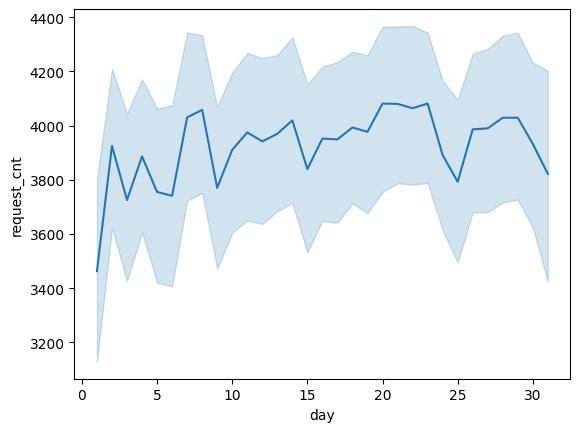

In [20]:
sns.lineplot(x='day',y='request_cnt',data=open) #접수건

<Axes: xlabel='day', ylabel='ride_cnt'>

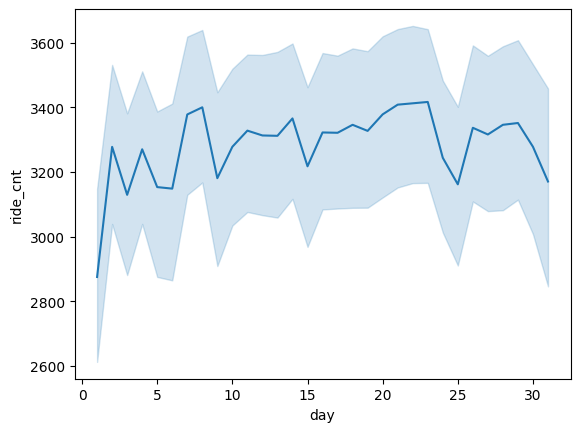

In [21]:
sns.lineplot(x='day',y='ride_cnt',data=open) #탑승건

* 대기시간

<Axes: xlabel='day', ylabel='waiting_time'>

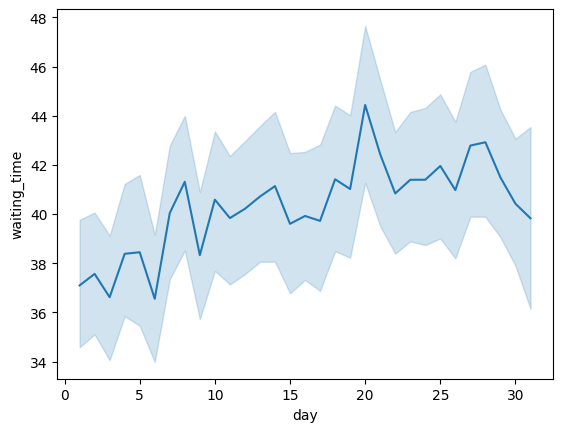

In [ ]:
sns.lineplot(x='day',y='waiting_time',data=open)

* 운임

<Axes: xlabel='day', ylabel='fare'>

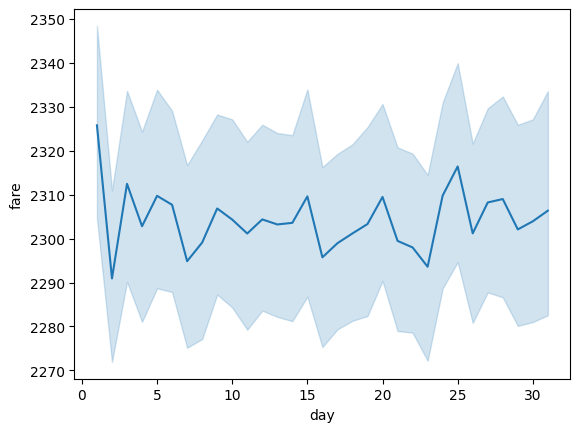

In [ ]:
sns.lineplot(x='day',y='fare',data=open)

* 이동거리

<Axes: xlabel='day', ylabel='distance'>

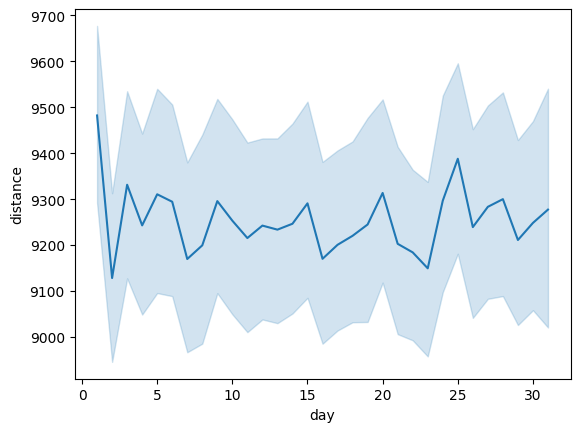

In [ ]:
sns.lineplot(x='day',y='distance',data=open)

### (3) 요일별 (boxplot활용)

* 차량 운행수

<Axes: xlabel='weekday', ylabel='car_cnt'>

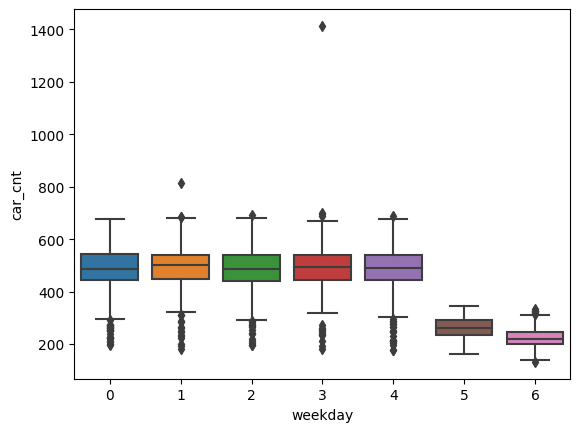

In [ ]:
sns.boxplot(x=open['weekday'],y=open['car_cnt']) # 0:월 1:화 5:토 6:일

* 접수건, 탑승건

<Axes: xlabel='weekday', ylabel='request_cnt'>

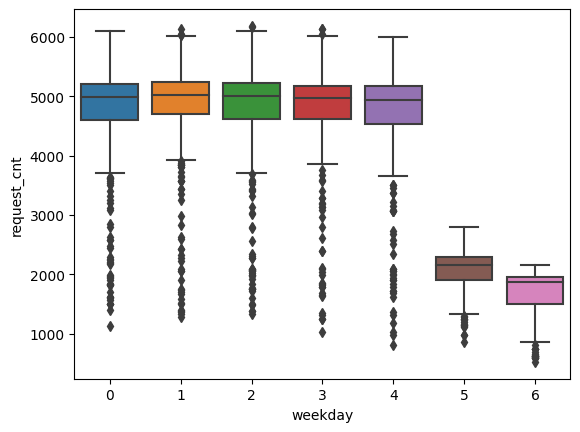

In [ ]:
sns.boxplot(x=open['weekday'],y=open['request_cnt'])

<Axes: xlabel='weekday', ylabel='ride_cnt'>

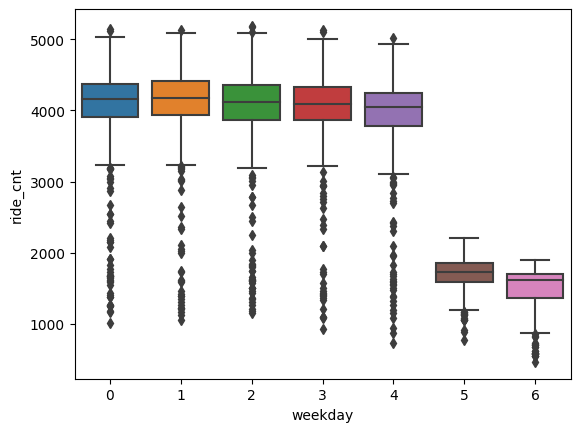

In [ ]:
sns.boxplot(x=open['weekday'],y=open['ride_cnt'])

* 대기시간

<Axes: xlabel='weekday', ylabel='waiting_time'>

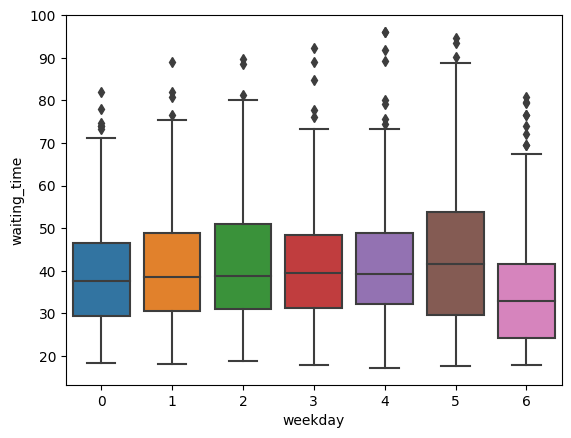

In [ ]:
sns.boxplot(x=open['weekday'],y=open['waiting_time'])

* 운임

<Axes: xlabel='weekday', ylabel='fare'>

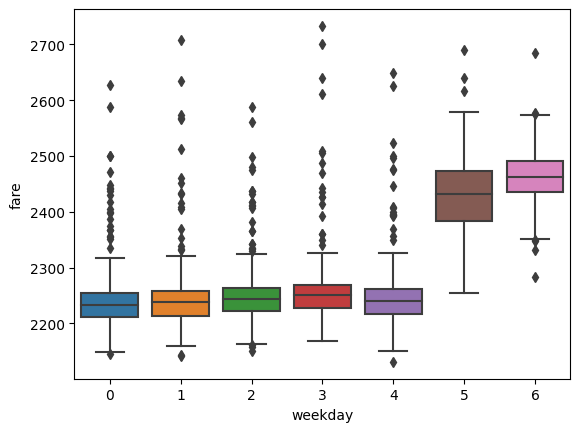

In [ ]:
sns.boxplot(x=open['weekday'],y=open['fare'])

* 이동거리

<Axes: xlabel='weekday', ylabel='distance'>

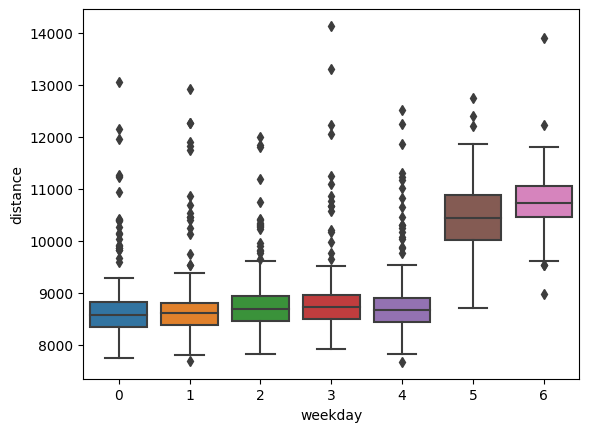

In [ ]:
sns.boxplot(x=open['weekday'],y=open['distance'])

### (4) 월별 (boxplot활용)

* 차량 운행수

<Axes: xlabel='month', ylabel='car_cnt'>

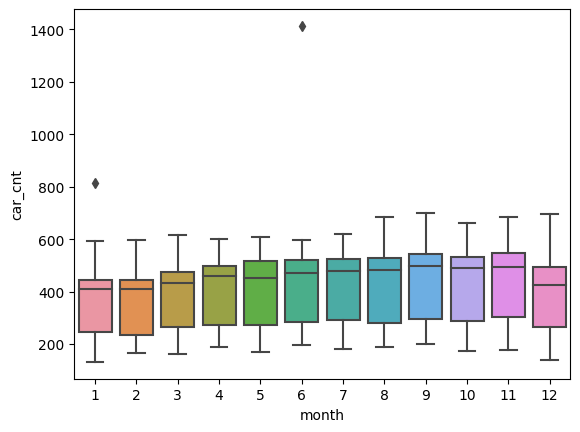

In [ ]:
sns.boxplot(x=open['month'],y=open['car_cnt'])

* 접수건, 탑승건

<Axes: xlabel='month', ylabel='request_cnt'>

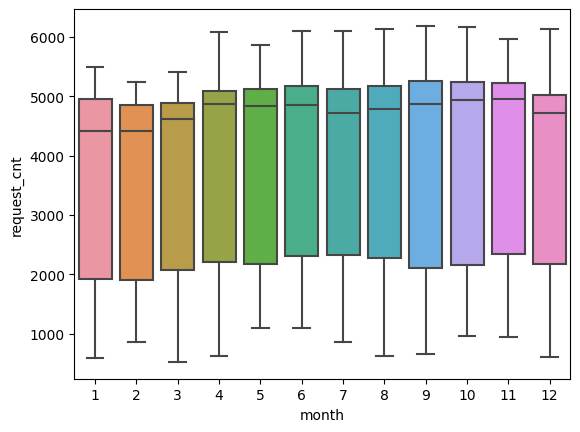

In [ ]:
sns.boxplot(x=open['month'],y=open['request_cnt'])

<Axes: xlabel='month', ylabel='ride_cnt'>

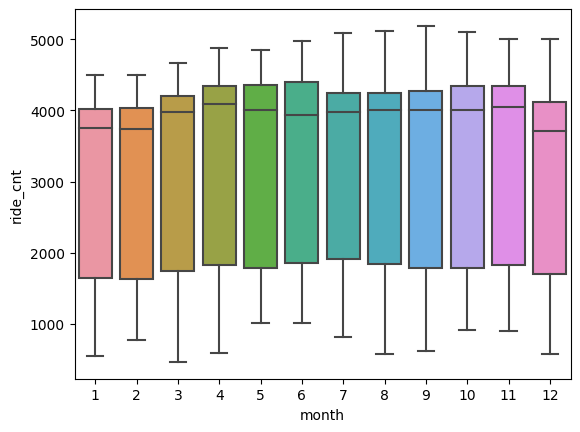

In [ ]:
sns.boxplot(x=open['month'],y=open['ride_cnt'])

* 대기시간

<Axes: xlabel='month', ylabel='waiting_time'>

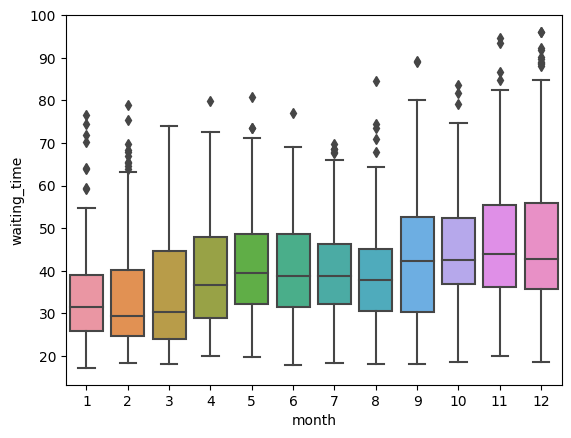

In [ ]:
sns.boxplot(x=open['month'],y=open['waiting_time'])

* 운임

<Axes: xlabel='month', ylabel='fare'>

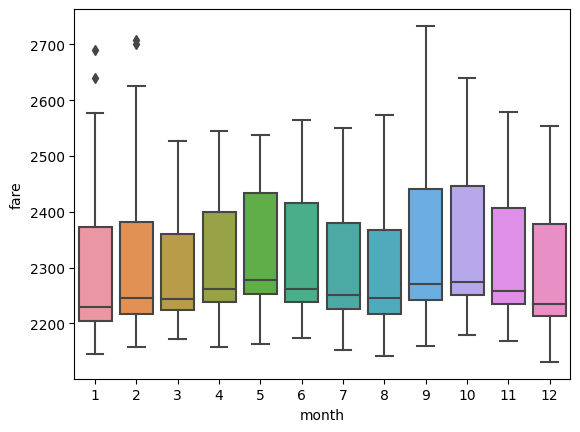

In [ ]:
sns.boxplot(x=open['month'],y=open['fare'])

In [ ]:
#휴일이 많은 5월, 추석 9월 연관?

* 이동거리

<Axes: xlabel='month', ylabel='distance'>

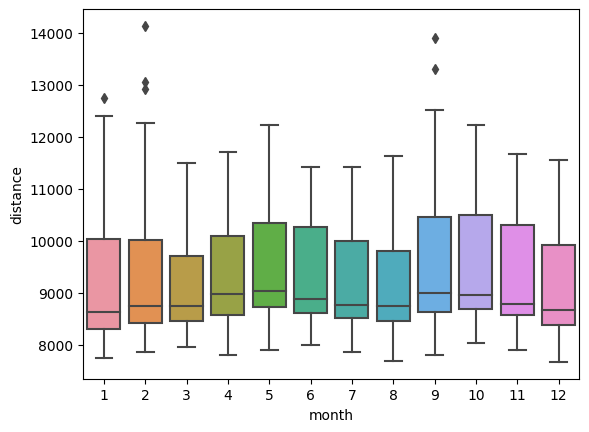

In [ ]:
sns.boxplot(x=open['month'],y=open['distance'])

In [ ]:
#휴일이 많은 5월, 추석 9월 연관?

### (5) 연도별 (boxplot 활용)

* 차량 운행수

<Axes: xlabel='year', ylabel='car_cnt'>

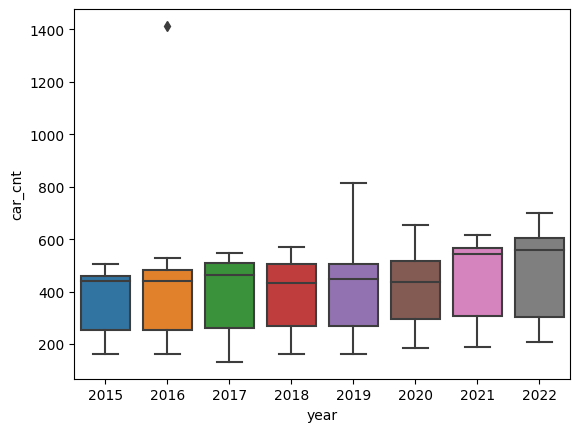

In [ ]:
sns.boxplot(x=open['year'],y=open['car_cnt'])

* 접수건, 탑승건

<Axes: xlabel='year', ylabel='request_cnt'>

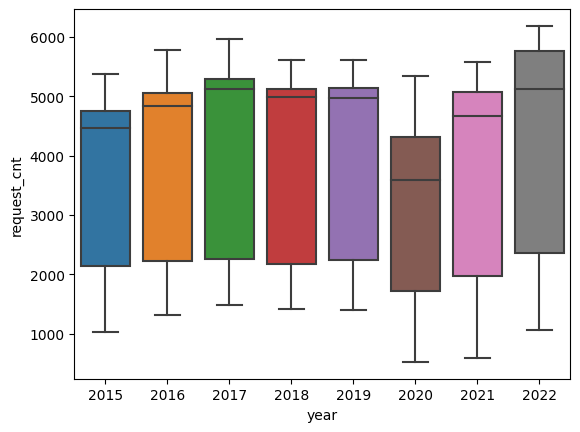

In [ ]:
sns.boxplot(x=open['year'],y=open['request_cnt'])

<Axes: xlabel='year', ylabel='ride_cnt'>

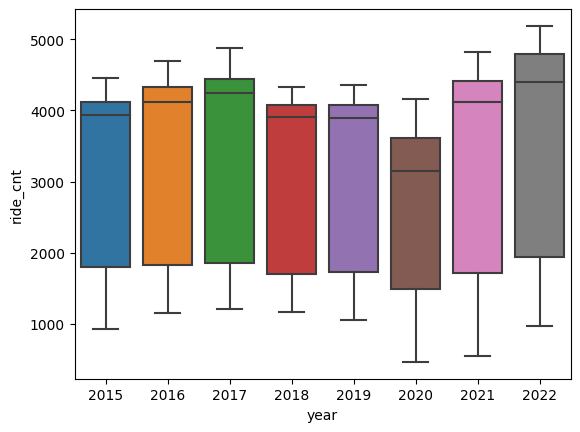

In [ ]:
sns.boxplot(x=open['year'],y=open['ride_cnt'])

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 :
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다.
            * 예를 들어,
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [ ]:
open['waiting_time']

0       23.2
1       17.2
2       26.2
3       24.5
4       26.2
        ... 
2917    44.4
2918    44.8
2919    52.5
2920    38.3
2921    33.7
Name: waiting_time, Length: 2922, dtype: float64

In [22]:
open.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,2015,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5


### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [26]:
# 익일의 대기시간(waiting time)을 오늘의 데이터를 활용하여 예측 해야하는 대상(target)으로 설정
open['waiting_time'] = open['waiting_time'].shift(1)

In [27]:
# 익일의 실제 날씨 데이터를 전일에 발표된 예보데이터로 판단
weather_tomorrow = weather.copy()
weather_tomorrow[['temp_max','temp_min','rain(mm)','humidity_max(%)','humidity_min(%)','sunshine(MJ/m2)']] = weather[['temp_max','temp_min','rain(mm)','humidity_max(%)','humidity_min(%)','sunshine(MJ/m2)']].shift(-1)

weather_tomorrow['Date'] = pd.to_datetime(weather_tomorrow['Date'])

tmp = pd.merge(open, weather_tomorrow, on='Date', how='inner')

df = tmp.copy()
df.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47


### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [28]:
conditions = [
    (df['month'] == 12) | (df['month']<= 2),
    (df['month'] >= 3) & (df['month'] <= 5),
    (df['month'] >= 6) & (df['month'] <= 8),
    (df['month'] >= 9) & (df['month'] <= 11)
    ]
values = ['winter','spring','summer','autumn']
df['season'] = np.select(conditions, values)

In [ ]:
#categorical 이해불가
# df['weekday'] = pd.Categorical(df['weekday'],
#                                ordered=True)
# df['season'] = pd.Categorical(df['season'],
#                                ordered=True)

# # df = df.sort_values(['weekday', 'month','year','season'],ascending=True)


In [29]:
df.tail()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season
2917,2022-12-27,669,5635,4654,44.4,2198,8178,1,12,52,2022,27,-0.3,-5.4,0.1,92.0,40.0,10.86,winter
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2,12,52,2022,28,1.7,-7.8,0.0,71.0,34.0,10.88,winter
2919,2022-12-29,581,5250,4247,52.5,2229,8433,3,12,52,2022,29,2.1,-4.0,0.0,87.0,38.0,10.84,winter
2920,2022-12-30,600,5293,4200,38.3,2183,8155,4,12,52,2022,30,-4.4,-4.4,0.0,66.0,66.0,0.00,winter
2921,2022-12-31,263,2167,1806,33.7,2318,9435,5,12,52,2022,31,NaN,NaN,NaN,NaN,NaN,NaN,winter


#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [30]:
!pip install workalendar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.4 MB/s eta 0:00:00


* 간단 사용법

In [31]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2023))

,0,1
0,2023-01-01,New year
1,2023-01-21,Korean New Year's Day
2,2023-01-22,Korean New Year's Day
3,2023-01-23,Korean New Year's Day
4,2023-03-01,Independence Day
5,2023-05-05,Children's Day
6,2023-05-26,Buddha's Birthday
7,2023-06-06,Memorial Day
8,2023-08-15,Liberation Day
9,2023-09-28,Midautumn Festival


In [32]:
cal = SouthKorea()
offday = pd.DataFrame(cal.holidays(2015)+cal.holidays(2016)+cal.holidays(2017)+cal.holidays(2018)+cal.holidays(2019)+cal.holidays(2020)+cal.holidays(2021)+cal.holidays(2022))

In [33]:
df['holiday'] = df['Date'].isin(offday[0]).astype(int)
df.head(20)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,winter,0
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0
5,2015-01-06,417,3991,3633,23.6,2211,8545,1,1,2,2015,6,-1.0,-8.8,0.0,42.0,24.0,10.12,winter,0
6,2015-01-07,410,4085,3676,24.7,2230,8646,2,1,2,2015,7,-0.2,-9.2,0.0,62.0,27.0,10.09,winter,0
7,2015-01-08,419,4030,3728,21.2,2231,8683,3,1,2,2015,8,3.2,-6.8,0.0,78.0,38.0,8.74,winter,0
8,2015-01-09,424,4167,3813,21.8,2215,8506,4,1,2,2015,9,4.3,-5.5,0.0,81.0,33.0,9.41,winter,0
9,2015-01-10,215,1916,1645,41.2,2447,11123,5,1,2,2015,10,2.3,-4.0,0.0,83.0,39.0,9.60,winter,0


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

In [38]:
df['waiting_time7'] =df['waiting_time'].rolling(7,min_periods = 1).mean()

#### 4) 탑승률

In [39]:
df['ride_per'] = (df['ride_cnt']/df['request_cnt']).round(3)

In [40]:
df.head(20)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,...,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,...,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,17.200000,0.899
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,...,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,21.700000,0.919
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,...,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,22.633333,0.927
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,...,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,23.525000,0.878
5,2015-01-06,417,3991,3633,23.6,2211,8545,1,1,2,...,-1.0,-8.8,0.0,42.0,24.0,10.12,winter,0,23.540000,0.910
6,2015-01-07,410,4085,3676,24.7,2230,8646,2,1,2,...,-0.2,-9.2,0.0,62.0,27.0,10.09,winter,0,23.733333,0.900
7,2015-01-08,419,4030,3728,21.2,2231,8683,3,1,2,...,3.2,-6.8,0.0,78.0,38.0,8.74,winter,0,23.371429,0.925
8,2015-01-09,424,4167,3813,21.8,2215,8506,4,1,2,...,4.3,-5.5,0.0,81.0,33.0,9.41,winter,0,24.028571,0.915
9,2015-01-10,215,1916,1645,41.2,2447,11123,5,1,2,...,2.3,-4.0,0.0,83.0,39.0,9.60,winter,0,26.171429,0.859


In [ ]:
df[df['season']=='winter']

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per
0,2015-01-01,213,1023,924,17.2,2427,10764,3,1,1,...,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903
1,2015-01-02,420,3158,2839,26.2,2216,8611,4,1,1,...,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,NaN,0.899
2,2015-01-03,209,1648,1514,24.5,2377,10198,5,1,1,...,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,NaN,0.919
3,2015-01-04,196,1646,1526,26.2,2431,10955,6,1,1,...,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,NaN,0.927
4,2015-01-05,421,4250,3730,23.6,2214,8663,0,1,2,...,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,NaN,0.878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.8,2198,8178,1,12,52,...,-0.3,-5.4,0.1,92.0,40.0,10.86,winter,0,43.514286,0.826
2918,2022-12-28,607,5654,4648,52.5,2161,7882,2,12,52,...,1.7,-7.8,0.0,71.0,34.0,10.88,winter,0,42.957143,0.822
2919,2022-12-29,581,5250,4247,38.3,2229,8433,3,12,52,...,2.1,-4.0,0.0,87.0,38.0,10.84,winter,0,41.042857,0.809
2920,2022-12-30,600,5293,4200,33.7,2183,8155,4,12,52,...,-4.4,-4.4,0.0,66.0,66.0,0.00,winter,0,41.657143,0.794


In [41]:
df.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,...,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,...,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,17.200000,0.899
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,...,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,21.700000,0.919
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,...,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,22.633333,0.927
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,...,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,23.525000,0.878


In [42]:
df['isRain'] = (df['rain(mm)']>0)
df.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,...,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903,False
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,...,-9.2,0.0,73.0,37.0,8.66,winter,0,17.200000,0.899,False
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,...,0.2,0.0,89.0,58.0,5.32,winter,0,21.700000,0.919,False
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,...,-0.9,0.0,95.0,52.0,6.48,winter,0,22.633333,0.927,False
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,...,-7.4,3.4,98.0,29.0,10.47,winter,0,23.525000,0.878,True


## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [43]:
joblib.dump(df, '/content/drive/MyDrive/project/data1.pkl')


['/content/drive/MyDrive/project/data1.pkl']